## ***Responsible AI - 2024***
### *Laboratorio 2 - OBJRECLAB*

--------------------

**NOMBRES**: Stefano Alberto

**APELLIDOS**: Aragoni Maldonado

**CARNE**: 20261

**FECHA**: 23/08/2024

**LINK**: https://github.com/stefanoaragoni/OBJRECLAB

--------------------

### **Instrucciones:**




Este laboratorio busca guiar a través del proceso de uso de SHAP (SHapley Additive exPlanations) para interpretar las decisiones tomadas por un modelo de aprendizaje profundo entrenado en el conjunto de datos CIFAR-10. Al final de este laboratorio, se espera generar visualizaciones de SHAP que revelen la influencia de las características de las imágenes en las predicciones del modelo.

-----------

#### *Importar Librerías*

Para comenzar, se importan las librerías necesarias para el desarrollo del laboratorio.

In [7]:
# --- Librerías ---
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import shap
import os
from ipywidgets import interact, IntSlider

# --- Configuración de TensorFlow y GPU ---
print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TensorFlow version: 2.14.0
GPU is available


#### *Importar Datos*

Posteriormente, se importan los datos necesarios para el desarrollo del laboratorio. En este caso, se importa el conjunto de datos CIFAR-10. 

Asimismo, se estandarizan las imágenes para que los píxeles tengan valores entre 0 y 1. Finalmente, también se definen los nombres de las clases del conjunto de datos CIFAR-10.

170498071/170498071 [==============================] - 22s 0us/step


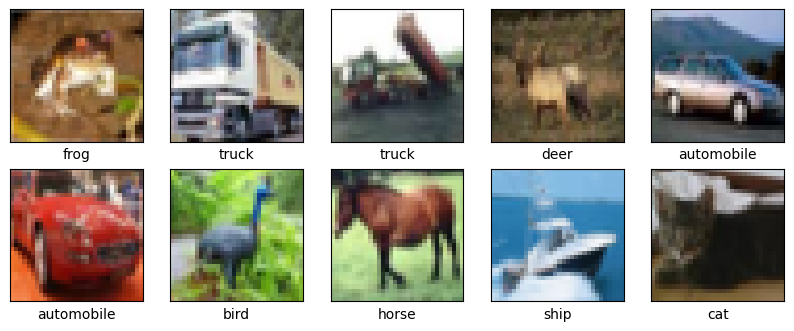

In [8]:
# --- Importar imágenes ---
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# --- Mostrar imágenes del dataset ---
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

#### *Crear y entrenar el modelo*

Como tercer paso, se procede a crear un modelo de aprendizaje profundo que se entrenará con el conjunto de datos CIFAR-10. Este modelo se compone de una red neuronal convolucional (CNN) con 3 capas convolucionales y 2 capas densas.

Se utiliza la función de pérdida `sparse_categorical_crossentropy` y el optimizador `Adam` para compilar el modelo.

In [13]:
# --- Crear modelo de red neuronal convolucional ---
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Una vez definido el modelo, se procede a entrenarlo con el conjunto de datos CIFAR-10. Se entrena el modelo durante 10 épocas. 

Además, se procede a guardar el modelo entrenado en un archivo llamado `cifar10_model.h5`. En caso de que el modelo ya haya sido entrenado, se carga el modelo desde el archivo `cifar10_model.h5`.

In [14]:
# --- Entrenar modelo o cargar modelo pre-entrenado ---
model_path = 'cifar10_cnn.keras'

if os.path.exists(model_path):
    print("Loading pre-trained model...")
    model = tf.keras.models.load_model(model_path)
else:
    print("No pre-trained model found. Training a new model...")
    model = create_model()
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
    model.save(model_path)
    print(f"Model saved to {model_path}")

No pre-trained model found. Training a new model...
Epoch 1/10
1563/1563 [==============================] - 22s 13ms/step - loss: 2.8055 - accuracy: 0.3877 - val_loss: 3.4935 - val_accuracy: 0.3167
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.2848 - accuracy: 0.4879 - val_loss: 2.5246 - val_accuracy: 0.4425
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.1202 - accuracy: 0.5382 - val_loss: 2.3202 - val_accuracy: 0.5463
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.1197 - accuracy: 0.5713 - val_loss: 8.5497 - val_accuracy: 0.2681
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.2149 - accuracy: 0.6002 - val_loss: 3.1624 - val_accuracy: 0.5127
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.2260 - accuracy: 0.6279 - val_loss: 2.2622 - val_accuracy: 0.6289
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - 

#### *Evaluación del Modelo*

Seguidamente, se evalúa el modelo entrenado con el conjunto de datos de prueba. Se calcula la precisión del modelo en el conjunto de datos de prueba.

In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")
print(f"Test loss: {test_loss:.2f}")

313/313 - 1s - loss: 3.1939 - accuracy: 0.6840 - 1s/epoch - 4ms/step
Test accuracy: 0.68
Test loss: 3.19


Además, se desarrolló una función que selecciona aleatoriamente una imagen del conjunto de datos de prueba y la muestra junto con la predicción del modelo. Esto permite visualizar cómo el modelo clasifica una imagen específica.

1/1 [==============================] - 0s 298ms/step


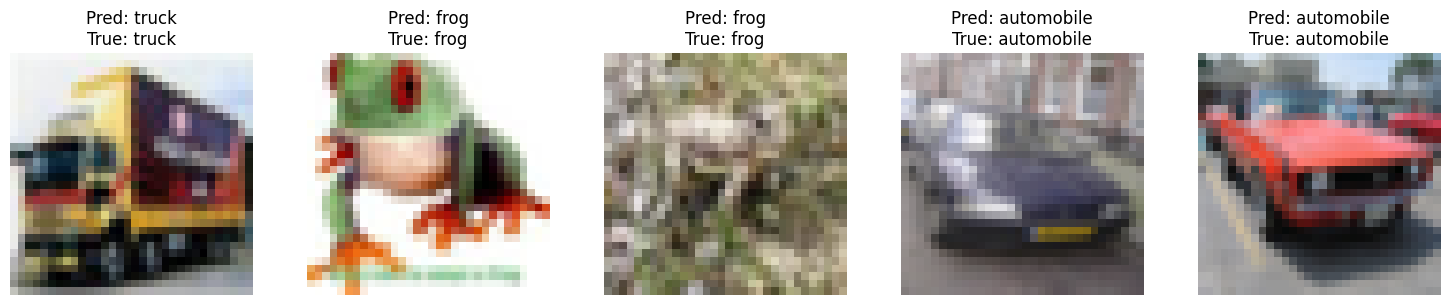

In [19]:
# --- Visualizar predicciones e imágenes ---
def test_model(model, test_images, test_labels, num_samples=5):
    indices = np.random.choice(test_images.shape[0], num_samples, replace=False)
    sample_images = test_images[indices]
    sample_labels = test_labels[indices]

    predictions = model.predict(sample_images)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(sample_images[i])
        predicted_class = class_names[np.argmax(predictions[i])]
        true_class = class_names[sample_labels[i][0]]
        ax.set_title(f"Pred: {predicted_class}\nTrue: {true_class}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

test_model(model, test_images, test_labels)

-----------

#### *SHAP: Configuración*

Con lo anterior realizado, se procede a configurar SHAP para interpretar las decisiones del modelo de aprendizaje profundo. 

En este caso, se define un total de 100 imágenes de prueba para las cuales se calcularán los valores SHAP. Luego, se crea un objeto `explainer` de SHAP para el modelo entrenado junto con el conjunto reducido de datos de prueba.

In [25]:
# --- Imágenes de ejemplo para explicar ---
num_background = 100
background_images = test_images[:num_background]

# --- SHAP Gradient Explainer ---
explainer = shap.GradientExplainer(model, background_images)

#### *SHAP: Función para visualización*

Posteriormente, se define una función que permite visualizar los valores SHAP de una imagen específica. Esta función recibe como parámetro el índice de la imagen en el conjunto de datos de prueba y muestra la imagen, la predicción del modelo y los valores SHAP de cada píxel.

Esto, obviamente, permite visualizar cómo cada píxel de la imagen influye en la predicción del modelo. Un valor más alto de SHAP indica que el píxel contribuye más a la predicción específica, mientras que un valor más bajo indica que el píxel contribuye menos.

In [26]:
# --- Visualización de SHAP ---
def shap_visualization(image_index):
    image = test_images[image_index:image_index+1]
    true_label = test_labels[image_index][0]

    # Generate and process SHAP values
    shap_values = explainer.shap_values(image)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    shap_values_for_class = shap_values[0, ..., predicted_class]
    shap_sum = np.sum(shap_values_for_class, axis=-1)

    # Normalize SHAP values for scatter plot
    shap_normalized = (shap_sum - shap_sum.min()) / (shap_sum.max() - shap_sum.min())

    # Create figure with subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Original Image
    axs[0].imshow(image[0])
    axs[0].set_title("Original Image\nTrue: " + class_names[true_label])
    axs[0].axis('off')

    # Scatter Plot with Stars on Image
    y, x = np.indices(shap_sum.shape)
    colors = shap_sum.flatten()  # Color by SHAP values
    sizes = 100 * shap_normalized.flatten() + 10  # Size of stars
    axs[1].imshow(image[0], aspect='auto')  # Display the original image as background
    scatter = axs[1].scatter(x.flatten(), y.flatten(), c=colors, s=sizes, cmap='coolwarm', marker='o', alpha=0.6)
    axs[1].set_title("SHAP Scatter on Image\nPredicted: " + class_names[predicted_class])
    axs[1].axis('off')
    fig.colorbar(scatter, ax=axs[1], orientation='vertical', fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

#### *SHAP: Pruebas de imágenes*

Por último, se seleccionan varias imágenes del conjunto de datos de prueba y se visualizan los valores SHAP de cada una de ellas. Esto permite observar cómo cada píxel de las imágenes influye en la predicción del modelo.

En esta primera imagen, se puede observar qué píxeles influyeron más en la identificación -correcta- de un caballo. Entre estos, los más influyentes son aquellos que forman la silueta del caballo, principalmente en las patas y espalda del animal. 

En este caso, el fondo de la imagen no influyó en la predicción del modelo, ya que los valores SHAP de estos píxeles son cercanos a cero.

1/1 [==============================] - 0s 11ms/step


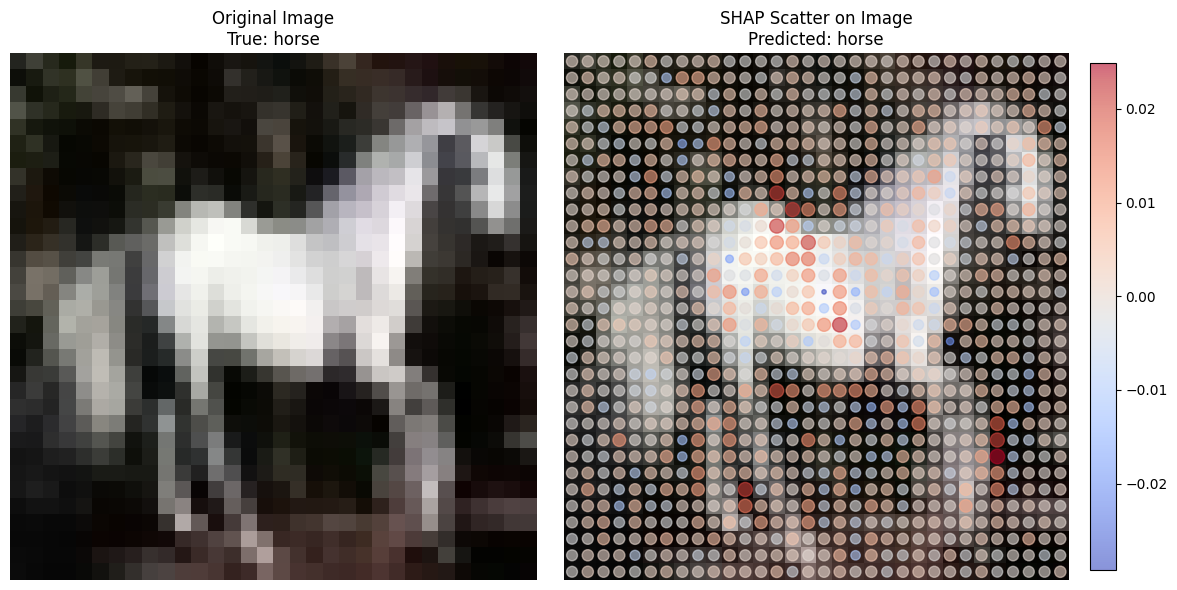

In [36]:
shap_visualization(13) 

En esta segunda imagen, nuevamente se tiene un caballo, pero solamente se observa la cabeza del animal. En este caso, los píxeles más influyentes son los que forman las orejas y el cuello del caballo. 

Sin embargo, también parece que los píxeles de fondo influyen en la predicción del modelo. Esto puede deberse a que la mayoría de las imágenes de caballos en el conjunto de datos de entrenamiento tienen un fondo similar.

1/1 [==============================] - 0s 10ms/step


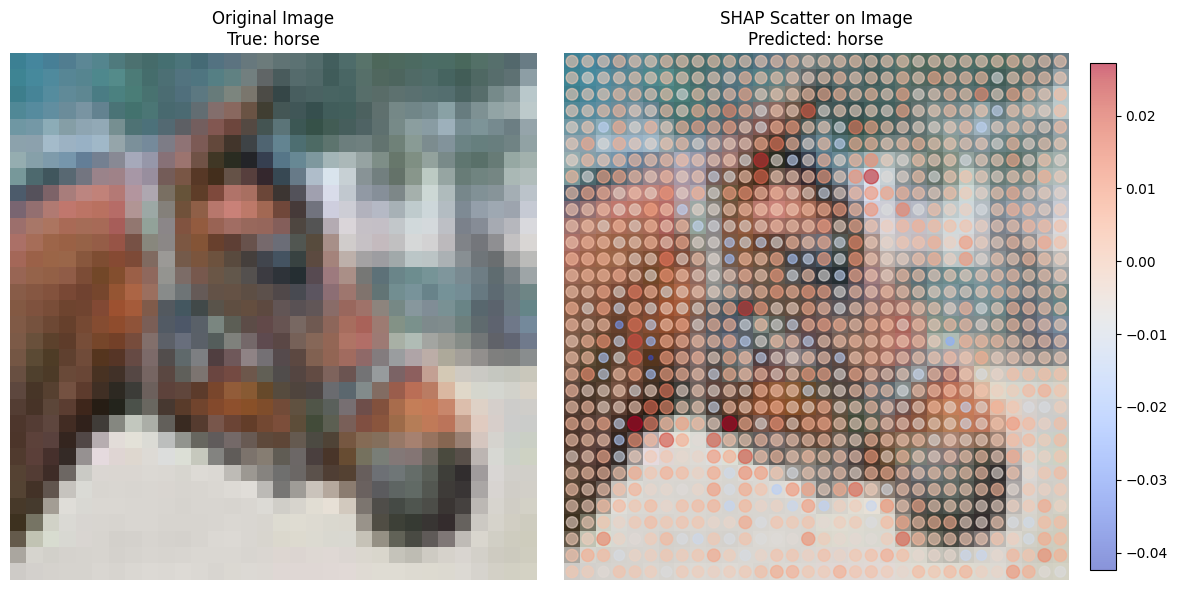

In [37]:
shap_visualization(17) 

La tercera imagen muestra una rana. En esta, se observa que los píxeles más influyentes son aquellos que concuerdan con las piernas y patas de la rana. Además, parece que los ojos también influyen en la predicción del modelo.

Nuevamente, debido a que los píxeles del fondo son blancos (SHAP values cercanos a cero), no influyen significativamente en la predicción del modelo.

1/1 [==============================] - 0s 10ms/step


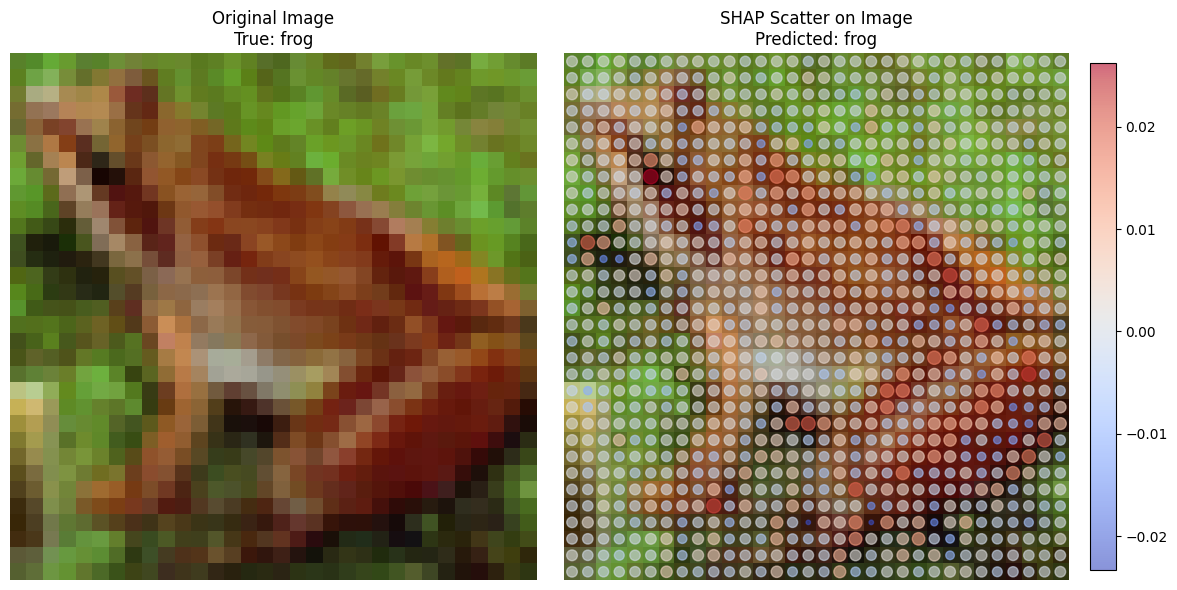

In [66]:
shap_visualization(29) 

A continuación, se presenta cómo el algoritmo logró identificar un camión en la cuarta imagen. En este caso, los píxeles más influyentes son aquellos que forman parte de las llantas. Además, se observa que los píxeles de los bordes del camión también influyen en la predicción del modelo.

1/1 [==============================] - 0s 10ms/step


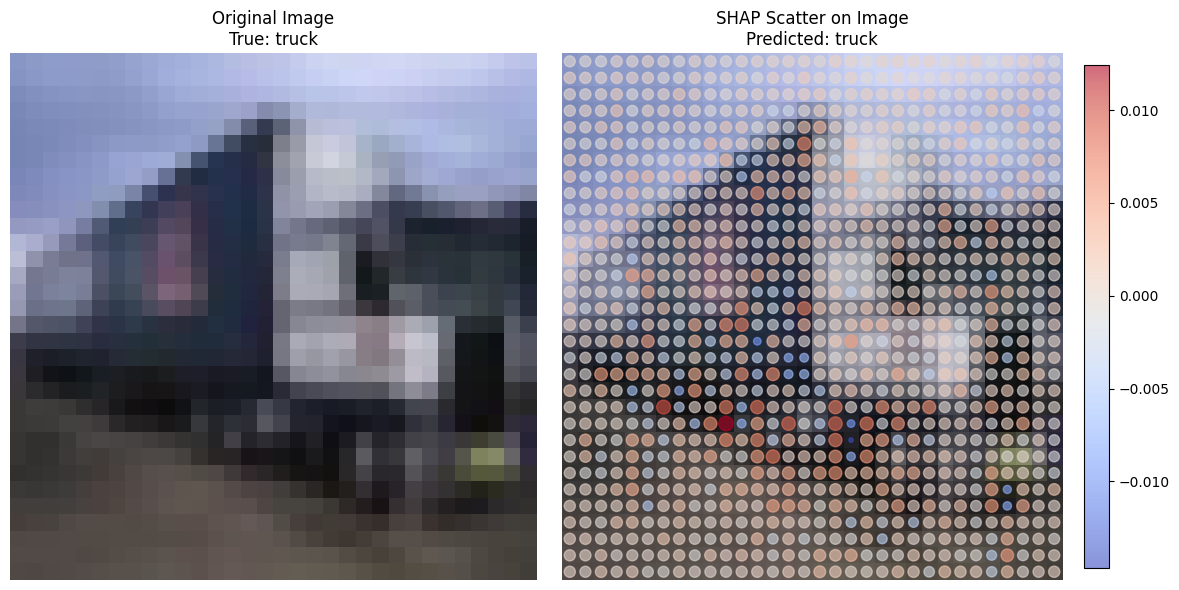

In [69]:
shap_visualization(34) 

En esta imagen, se observa un gato siendo sostenido por una persona. Los píxeles más influyentes son aquellos que forman parte de la nariz y orejas del gato.

Sin embargo, la mano del humano que sostiene al gato también influye en la predicción del modelo. Esto probablemente se deba a que varias imágenes de gatos en el conjunto de datos de entrenamiento tienen una mano humana en ellas. Por lo tanto, el modelo ha aprendido a asociar la presencia de una mano humana con la clase de gato.

1/1 [==============================] - 0s 11ms/step


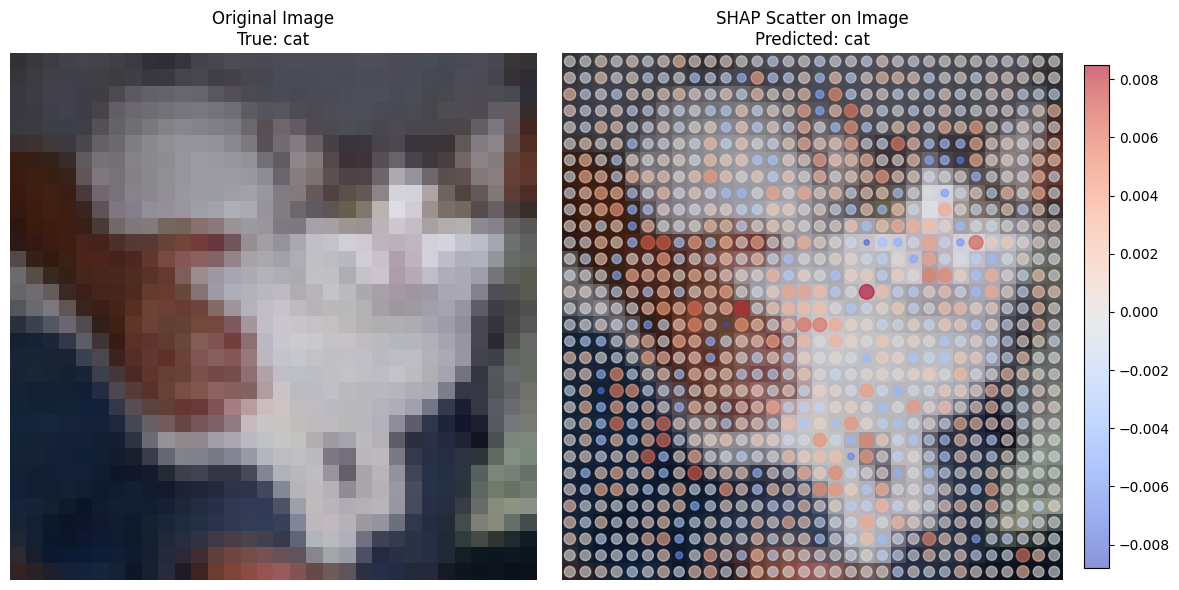

In [91]:
shap_visualization(78) 

En esta última imagen, se observa un avión que el modelo identificó incorrectamente como un barco. En este caso, los píxeles más influyentes son aquellos que forman parte de las alas. Es posible que la forma de las alas del avión se asemeje a la forma de un barco, lo que llevó a una predicción incorrecta.

1/1 [==============================] - 0s 10ms/step


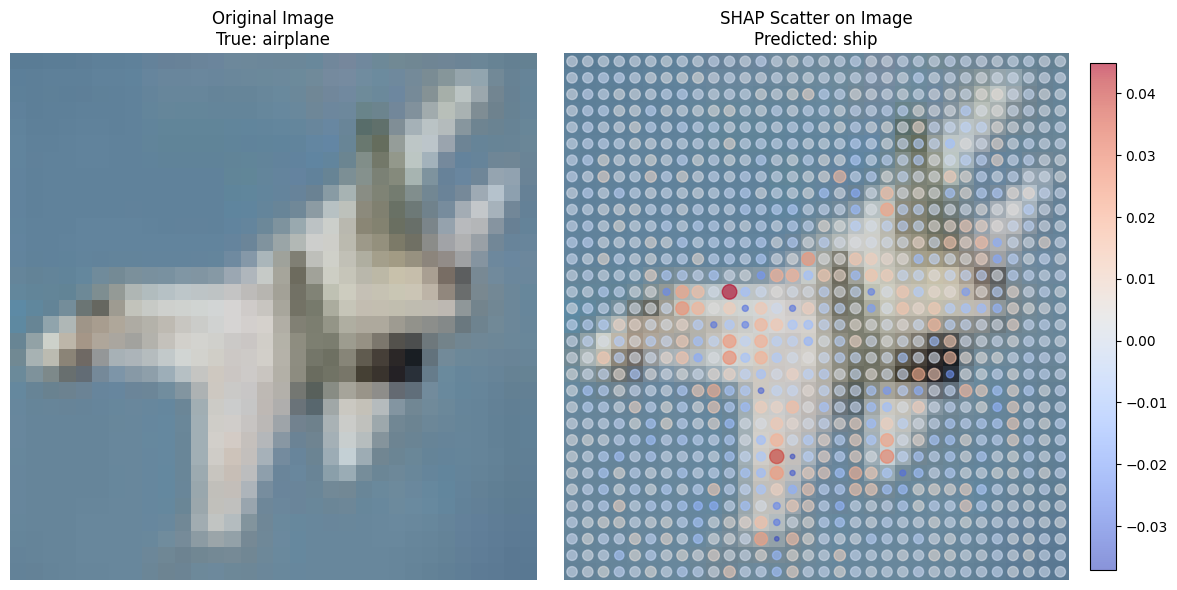

In [95]:
shap_visualization(10) 

-----------

#### *Conclusiones*

- SHAP permitió visualizar cómo cada píxel de una imagen influye en la predicción de un modelo de aprendizaje profundo. Esto proporciona una mayor comprensión de cómo el modelo toma decisiones y qué características de las imágenes son más importantes para las predicciones.

- Se logró identificar cómo ciertas características de las imágenes, como la forma de un caballo o las orejas de un gato, influyen en la predicción del modelo. Además, se observó cómo el fondo de las imágenes puede influir en la predicción del modelo, especialmente si las imágenes de entrenamiento tienen un fondo similar.

- SHAP, en general, permite una mayor transparencia y comprensión de los modelos de aprendizaje profundo, lo que es fundamental para garantizar la responsabilidad y la interpretabilidad en la inteligencia artificial.

- Se vió necesario alterar la estructura de la red neuronal convolucional para mejorar la precisión del modelo. Esto se logró al agregar más capas convolucionales y densas, lo que permitió al modelo aprender características más complejas de las imágenes. Sin embargo, esto fue algo independiente de la interpretación de los valores SHAP.

- Se considera que, de haber tenido otro dataset como de personas, la utilización de SHAP hubiera sido más interesante, ya que se hubiera podido identificar qué características de las personas influyen en la predicción del modelo. Esto podría incluso revelar sesgos en el modelo, como la asociación de ciertas características con ciertas clases.